In [1]:
# Importación de librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir('c:\\Users\\Julian\\Desktop\\Cursos\\Cursos Github\\Metodos_estadisticos')

In [3]:
df = pd.read_csv('Data sets\\datos.csv')

In [4]:
print(df.columns)
df.sample(5)

Index(['primary_key', 'MES_x', 'CLASE_x', 'FEX_C18_x', 'DPTO_x', 'SEXO',
       'EDAD', 'CAMPESINO', 'CULTURA', 'EST_CIVIL', 'LEE', 'NIVEL_EDUC',
       'EDUC', 'NIVEL_EDUC_CAT', 'MES_y', 'CLASE_y', 'FEX_C18_y', 'DPTO_y',
       'contrato', 'contrato_verbal', 'termino_contrato', 'misma_empresa',
       'tiempo_trabajo', 'puesto', 'empresa_registrada', 'salario_bruto',
       'hora_semanales', 'no_empleados', 'RAMA2D_R4', 'INGLABO', 'RAMA4D_R4',
       'OFICIO_C8'],
      dtype='object')


,primary_key,MES_x,CLASE_x,FEX_C18_x,DPTO_x,SEXO,EDAD,CAMPESINO,CULTURA,EST_CIVIL,...,tiempo_trabajo,puesto,empresa_registrada,salario_bruto,hora_semanales,no_empleados,RAMA2D_R4,INGLABO,RAMA4D_R4,OFICIO_C8
348525,7551509-1-1-1,septiembre,2,469.363958,Caldas,Hombre,43,1,6,Casado,...,0,7,9.0,600000.0,50,2,1,600000.0,123,9211
103247,7320877-1-1-1,enero,1,106.285507,Arauca,Hombre,35,2,6,Soltero,...,4,4,NaN,NaN,48,7,84,3000000.0,8413,2642
363806,7565361-1-3-1,septiembre,1,126.801473,Cauca,Mujer,26,2,6,Soltero,...,3,3,2.0,400000.0,36,1,97,400000.0,9700,5311
291348,7611677-1-3-1,noviembre,1,1181.397253,Magdalena,Hombre,29,2,6,Pareja >= 2,...,96,4,NaN,NaN,60,1,49,1000000.0,4921,8321
271733,7450151-1-1-1,mayo,2,211.336225,Quindio,Hombre,28,2,6,Soltero,...,12,1,9.0,1800000.0,40,6,1,1800000.0,144,2250


In [28]:
df = df[(df.INGLABO >= 5000)] 
df = df.dropna(subset=['INGLABO'])

In [29]:
pd.options.display.float_format = '{:.2f}'.format
df.INGLABO.describe()

count      348329.00
mean      1496001.39
std       2173975.58
min          5000.00
25%        600000.00
50%       1160000.00
75%       1500000.00
max     124000000.00
Name: INGLABO, dtype: float64

In [30]:
df.EDAD.describe()

count   348329.00
mean        41.15
std         13.90
min         15.00
25%         30.00
50%         40.00
75%         52.00
max         98.00
Name: EDAD, dtype: float64

## Medidas de centralidad

### La media 

La media de un conjunto de observaciones es simplemente un promedio normal y antiguo: se suman todos los valores y luego se divide por el número total de valores.

$$\bar{x} = \frac{1}{n}  \ \sum_{i=1}^{n} x_{i}$$

In [36]:
n = len(df.INGLABO)
Sigma = sum(df.INGLABO)
1/n * Sigma # 1'496.001

1496001.3938316936

In [37]:
df.INGLABO.mean() # mean funciona por numpy y pandas

1496001.3938316936

In [38]:
import statistics
statistics.mean(df.INGLABO)

1496001.3938316936

### La mediana

In [80]:
# Ordenamos los valores
sorted_inglabo = df.INGLABO.sort_values(ascending= True)
sorted_inglabo

321938        5000.00
203173        5000.00
349761        5000.00
62677         5000.00
182917        5000.00
             ...     
103755   100000000.00
135500   100000000.00
318842   100000000.00
225057   100000000.00
91644    124000000.00
Name: INGLABO, Length: 348329, dtype: float64

In [94]:
# Calculamos la mediana

if n % 2 == 1:  # Si el número de elementos es impar
    mediana = sorted_inglabo.iloc[n // 2]  # Tomamos el valor central
else:  # Si el número de elementos es par
    mediana = (sorted_inglabo.iloc[n // 2 - 1] + sorted_inglabo.iloc[n // 2]) / 2  # Promedio de los dos valores centrales

print(mediana)


1160000.0


In [106]:
# Creamos la formula

def fmediana(x):
    import pandas as pd
    x = pd.Series(x)
    n = len(x)
    x = x.sort_values(ascending= True)
    if n % 2 == 1:
        return x.iloc[n // 2] 
    else: 
        return (x.iloc[n // 2 - 1] + x.iloc[n // 2]) / 2

In [107]:
fmediana(df.INGLABO)

1160000.0

In [108]:
df.INGLABO.median()

1160000.0

In [109]:
fmediana(df.EDUC)

3.0

In [110]:
df.EDUC.median()

3.0

### Media o mediana

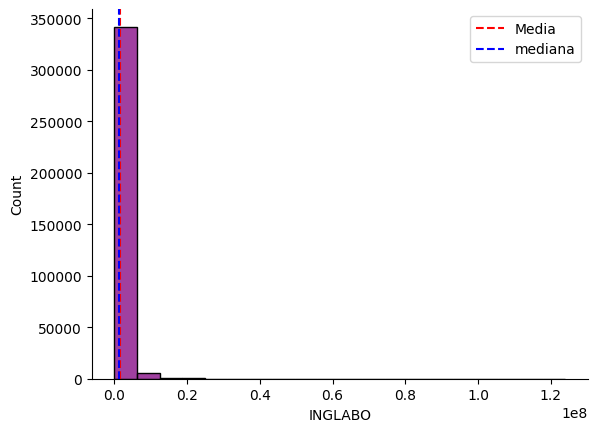

In [118]:
media = df.INGLABO.mean()
mediana = df.INGLABO.median()

sns.histplot(df.INGLABO, bins='sturges', color = 'purple')
plt.axvline(media, color = 'red', linestyle = '--', label = 'Media')
plt.axvline(mediana, color = 'blue', linestyle = '--', label = 'mediana')

plt.legend()

sns.despine();

In [115]:
def comparacion_centralidad(x, bins = 'sturges', color_bars = 'purple', color_media = 'red',color_mediana = 'blue'):
    x = pd.Series(x)
    
    media = x.mean()
    mediana = x.median()
    
    sns.histplot(x, bins = bins, color = color_bars)
    plt.axvline(media, color = color_media, linestyle = '--', label = 'Media')
    plt.axvline(mediana, color = color_mediana, linestyle = '--', label = 'Mediana')
    plt.legend()
    plt.plot()

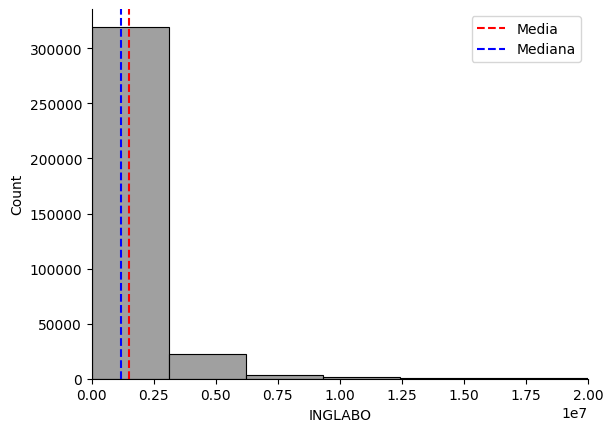

In [136]:
comparacion_centralidad(df.INGLABO, color_bars= 'gray', bins= 40)
sns.despine()
plt.xlim(0,20000000);

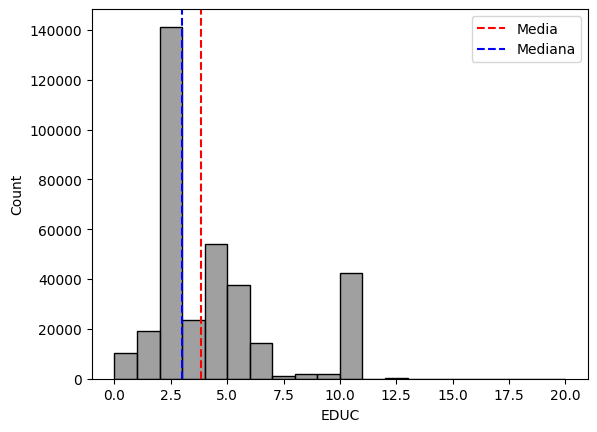

In [137]:
comparacion_centralidad(df.EDUC, color_bars= 'gray')
sns.despine;

### Media truncada o recordada (Trimmed mean)

Cuando nos enfrentamos a una situación en la que algunas de las observaciones con valores más extremos podrían no ser del todo fiables, la media no es necesariamente una buena medida de la tendencia central. Es muy sensible a uno o dos valores extremos y, por tanto, no se considera una medida robusta . Un remedio que hemos visto es utilizar la mediana. Una solución más general es utilizar una "media recortada". Para calcular una media recortada, lo que se hace es "descartar" los ejemplos más extremos de ambos extremos (es decir, el mayor y el menor) y, a continuación, tomar la media de todo lo demás.

In [138]:
import statistics

statistics.median(dataset)

1496001.3938316936

In [143]:
from scipy import stats

print(f'Media: {statistics.mean(df.INGLABO)}')
print(f'Mediana: {statistics.median(df.INGLABO)}')
print(f'Media truncada: {stats.trim_mean(df.INGLABO, 0.1)}')


Media: 1496001.3938316936
Mediana: 1160000.0
Media truncada: 1161590.1155939929


### Moda
Valor que ocurre con mayor frecuencia.

Si bien es cierto que la moda se calcula con mayor frecuencia cuando se tienen datos de escala nominal (porque las medias y las medianas son inútiles para ese tipo de variables), hay algunas situaciones en las que realmente se desea conocer la moda de una variable de escala ordinal, de intervalo o de razón.

In [145]:
df.EST_CIVIL.value_counts()

EST_CIVIL
Pareja >= 2    112373
Soltero         92932
Casado          68003
Separado        57654
Pareja < 2       9628
Viudo            7739
Name: count, dtype: int64

In [146]:
statistics.mode(df.EST_CIVIL)

'Pareja >= 2'

## Medidas de variabilidad

 La segunda cosa que realmente queremos es una medida de la variabilidad de los datos. Es decir, ¿qué tan "dispersos" están los datos? ¿Qué tan "lejos" de la media o la mediana tienden a estar los valores observados? 

### Rango
Es el valor más grande menos el valor más pequeño.

In [150]:
df.EDAD.min(), df.EDAD.max()

(15, 98)

### Rango intercuartil

El rango intercuartil (RIC) es como el rango, pero en lugar de calcular la diferencia entre el valor más grande y el más pequeño, calcula la diferencia entre el cuartil 25 y el cuartil 75.

El rango intercuartil es el rango abarcado por la “mitad media” de los datos. 

In [153]:
np.quantile(df.EDAD, [.25,.75])

np.quantile(df.EDAD, .75) - np.quantile(df.EDAD, .25)

22.0

In [154]:
stats.iqr(df.EDAD)

22.0

### Desviación absoluta media 

Mean absolute deviation (MAD)

Las dos medidas que hemos analizado hasta ahora, el rango y el rango intercuartil, se basan en la idea de que podemos medir la dispersión de los datos observando los cuantiles de los mismos. Sin embargo, esta no es la única forma de pensar en el problema. Un enfoque diferente es seleccionar un punto de referencia significativo (normalmente la media o la mediana) y luego informar las desviaciones "típicas" con respecto a ese punto de referencia. 

$$ MAD(X) = \frac{1}{N} \sum_{i=1}^{N} |X_{i} - \bar{X}|$$

In [169]:
stats.median_abs_deviation(df.INGLABO) # Este lo calcula con respecto a la mediana

460000.0

In [166]:
def mad(x):
    x = pd.Series(x)
    x_bar = np.mean(x)  # Calcular la media
    AD = np.abs(x - x_bar)  # Calcular desviaciones absolutas
    ADD = np.mean(AD)  # Calcular la media de las desviaciones absolutas
    return ADD

In [167]:
mad(df.INGLABO)

965671.7187074285

### Varianza

$$Var(x) = \frac{1}{N} \sum_{i=1}^{N} (x_{i} - \bar{x})^2$$

In [172]:
df.INGLABO.var() # este usa la corrección de Bessel para obtener estimador

4726169823693.522

In [174]:
statistics.variance(df.INGLABO), statistics.pvariance(df.INGLABO)

(4726169823693.523, 4726156255573.087)

### Desviación estándar

$$ \sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_{i} - \bar{x})^2}$$

In [175]:
df.INGLABO.std()

2173975.5802891445

In [177]:
statistics.stdev(df.INGLABO), statistics.pstdev(df.INGLABO)

(2173975.580289145, 2173972.459708974)

### Regla empírica 

La Regla Empírica, también conocida como la Regla del 68-95-99.7, se aplica a distribuciones normales (campana de Gauss) y establece lo siguiente:
- Aproximadamente el 68% de los datos se encuentran dentro de una desviación estándar de la media
- Aproximadamente el 95% de los datos se encuentran dentro de dos desviaciones estándar de la media
- Aproximadamente el 99.7% de los datos se encuentran dentro de tres desviaciones estándar de la media

### Teorema de Chebyshev

El Teorema de Chebyshev es un resultado más general que se aplica a cualquier distribución, independientemente de su forma. Establece que, para cualquier número real $k>1$ al menos $\frac{1}{k^2}$ de los datos se encuentran dentro de $k$ desviaciones estándar de la media

$$P(|X-\mu| < k \sigma) \geq 1 - \frac{1}{k^2}$$

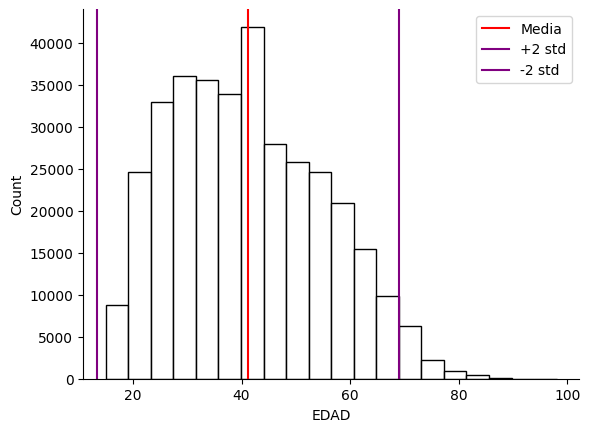

In [185]:
sns.histplot(df.EDAD, bins= 'sturges', color = 'white')
plt.axvline(df.EDAD.mean(), color = 'red', label = 'Media')
plt.axvline(df.EDAD.mean() + 2*df.EDAD.std(), color = 'purple', label = '+2 std')
plt.axvline(df.EDAD.mean() - 2*df.EDAD.std(), color = 'purple', label = '-2 std')
sns.despine()
plt.legend();
